# Chapter 2 Gotchas

Chapter1で簡単に述べたように、`SymPy`は`Python`のライブラリとして提供されている。そのため**`Python`の構文規則は全く同様に使える**。

例えば、四則演算`+`, `-`, `*`, `/`, `//`, `%` は`SymPy`でも同様に使える。

**コメント**: 
チュートリアル原文では、SymPyで扱う変数を*SymPyシンボル*と呼んでいます。Pythonではシンボルに対応する概念がないのですが、チュートリアルに従っています。*SymPyオブジェクト*と呼んだときは、*SymPy*で定義されている関数・メソッドや、*SymPy*シンボル等を含めて総称として呼ぶことにします。

### 2.1 Symbols

In [3]:
from sympy import * #関数やクラスをすべてインポートする.
init_printing() #表示をキレイにするため、

In [2]:
x + 1

NameError: name 'x' is not defined

---> Python(オブジェクト)では「変数」は意味を持たない. 値を代入して初めて意味を持つ. その意味で
```
NameError: name 'x' is not defined
```
が出ている。

**注意** `sympy`で変数として扱いたい文字は、`SymPy`オブジェクトに変換するために`symbols`で定義しないといけない:

In [6]:
x = symbols('x') #引数は文字列(str)

In [7]:
type(x)

sympy.core.symbol.Symbol

*コメント*: 一つの変数を定義するときも、`symbols()`が使える。1変数用に`Symbols`が定義されているが、必要ないかも?

##### 複数の変数を定義する

In [4]:
x, y, z = symbols('x, y, z') #引数はスペースだけでも良い.

このようにして定義された変数は、(Pythonの変数とは違い)変数それ自体として意味を持つ. すなわち

In [6]:
a, b = symbols('a, b')

In [7]:
a

In [9]:
type(a) #aはSymPyオブジェクト

sympy.core.symbol.Symbol

In [7]:
b

となって、出力結果が文字`a`, `b`で表現されている。

ところで上の定義の`a`, `b`を入れ替えて

In [29]:
a, b = symbols('b a') #左辺: Sympyシンボル 右辺:pythonオブジェクト

とすると、

In [9]:
a

In [10]:
b

と出力される。

これは何を意味するか? `a`と名付けられたPython変数(左辺)は、`Sympy`シンボルの`b`(右辺)に対応している(残りも同様). これは非常に混乱しやすいので、通常は名前をそれぞれ一致させるようにする.

**例外**: 

- Sympyのシンボル名がPythonの予約語を含んでいるとき
- シンボル名(=Sympyの変数)がとても長く、短いPython変数で表したいとき

##### Python変数とSympyシンボルの違い

次に代入操作の違いについて考える.

In [11]:
x = symbols('x')

In [12]:
expr = x + 1 #xはSympyシンボル

このSymPyシンボル`x`に対して、`Python`でよく知られた以下の代入操作を行うとどうなるだろうか？

In [13]:
x = 2

In [14]:
print(expr)

x + 1


`expr = 3`が出力されない！しかしながら`x`は値`2`が代入されている.

In [15]:
x

*コメント* `expr`は`SymPy`シンボル`x`で定義されているが、代入操作`x = 2`はそれの定義**後**に行われている. そのため`expr`は変更を受けない。

もしこの代入操作を反映した`expr`がほしいなら、以下のように**`expr`を定義する前に**代入操作を行う必要がある.

In [ ]:
x = symbols('x')

In [11]:
x = 2

In [12]:
expr = x + 1

In [13]:
expr

In [14]:
x

以上の操作は文字列に対しても同様に考えることができる.

**例**

In [9]:
x = 'abc'

In [10]:
expr = x + 'def'

In [11]:
expr

'abcdef'

In [12]:
x = 'ABC' #exprの定義後に代入

In [13]:
expr #'ABCdef'にならない.

'abcdef'

**Q.** では、プログラムの中で`x`が変更を受けた後、再度exprの値を評価するにはどうすればよいか？

In [18]:
x = symbols('x')

In [19]:
expr = x + 1

In [22]:
expr.subs({x:2}) #代入操作(多変数への代入があるとき)

In [21]:
expr.subs(x,2) #代入操作(一変数への代入のとき)

### 2.4 等号

等号`=`, 真偽判定`==` もPythonと同様にして使えるが、数式評価には注意が必要

In [20]:
x + 1 == 4

False

--->日常でよく用いられる数式としてのイコール(`=`)とは違う!? (`Python`では論理判定として使われている)

つまり、*通常私たちはa=bか判定するのは、Pythonで`a == b`を行っているのと同じ.*

等式を表すには、`Eq`関数を使う

In [23]:
Eq(x + 1, 4)

[等式判定] **Q.** たとえば $$(x+1)^2=x^2+2x+1$$が正しいかどうか知りたいとき、上で用いた==は使えるだろうか？

In [26]:
(x + 1)**2 == x**2 + 2*x + 1 #使えない！

False

ここで、==は両辺の表式が完全に等しいか聞いている。**記号として等しくないと**`True`判定にならない。 ---> 括弧の位置、変数の位置諸々異なる。

「`a == b` を調べること「 (同じ) 「`a = b` を調べること」 (同じ) 「`a - b = 0`を調べること」

===> つまり、数式評価を行うには`a - b = 0`の形で行うのがベスト。


その上で、`Eq`関数を使うときは、`(右辺)=0`となるような式の左辺を第一引数に入れるようにする.

式変形は`simplify()`関数で実行可能(詳しくは次章以降)

In [27]:
a = (x + 1)**2

In [28]:
b = x**2 + 2*x + 1

In [24]:
simplify(a - b) #a - b が 0 に等しくなることをチェック.

In [25]:
c = x**2 - 2*x + 1

In [26]:
simplify(a - c)

##### 任意の点で等しいかどうか調べる方法

In [32]:
a = cos(x)**2 - sin(x)**2

In [33]:
b = cos(2*x)

In [34]:
a.equals(b) #equalsメソッドを使う.

True

### 2.5 ^ と /

`^` : or, `/` : and (論理判定)

In [35]:
True ^ False

True

In [36]:
True ^ True

False

In [37]:
x ^ y 

**注意**: べき乗として`^`を使ってはいけない.

##### コメント

- `Sympy`オブジェクト + `Sympy`オブジェクト
- `Sympy`オブジェクト + `Python`オブジェクト 

--> これらすべてSympyオブジェクトを与える.

In [38]:
type(Integer(1) + 1) #Sympyオブジェクト+ Pythonオブジェクト

sympy.core.numbers.Integer

In [39]:
type(1 + 1) #Pythonオブジェクト + Pythonオブジェクト = Pythonオブジェクト

int

##### 注意 : 割り算

**注意**: SymPyオブジェクトとしての整数型`Integer()`同士の割り算は有理数を与える。
(浮動小数点数でない。)

In [27]:
Integer(1) / Integer (3) #SymPy: 有理数

In [41]:
type(Integer(1) / Integer (3))

sympy.core.numbers.Rational

In [42]:
1 / 3 #Python: 浮動小数点数

**注意** 

- `Python2`では、整数型同士の割り算は小数点切り捨てになる

```
>> 1 / 3 = 0
```
- また以下を付けたときは、`Python2`でも浮動小数点数になる.

```
from __future__ import division
```


`Python`での計算なら、上のように浮動小数点数で得られる.

---> 上でまとめたように、`Python`のバージョンで `/`の役割が異なるので、`SymPy`で割り算を表したいときは`Rational`関数を用いると良い。

In [43]:
Rational(1,3) 

In [44]:
type(Rational(1,3))

sympy.core.numbers.Rational

のように定義する。このようにすれば

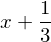

In [45]:
x + Rational(1,3)

In [46]:
type(x + Rational(1,3))

sympy.core.add.Add

とおける。

このあたりの注意については
http://docs.sympy.org/latest/gotchas.html#gotchas
を読む。